# Welcome to this Rhyme project "Exploratory Data Analysis" on Coursera Labs.

In this project, you will learn practically how to create and apply graphical techniques in exploratory data analysis (EDA).

We will go through 5 tasks to implement our project:

Task 1: Definining Exploratory Data Analysis with an overview of the whole project (This first recorded non-technical task isn't included in the Jupyter notebook).

Task 2: Importing libraries and Exploring the Dataset.

Task 3: Checking missing values and Outliers.

Task 4: Creating visual methods to analyze the data.

Task 5: Analyzing trends, patterns, and relationships in the Data.

# Task 2: Importing libraries and Exploring the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [2]:
# Read the Dataset
insurance_df = pd.read_csv("insurance-data.csv")

In [3]:
#Display the first 10 examples in the dataset

insurance_df.head() ### Fill out the Number of examples

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Expected output:

    The data should consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)

# Task 3: Checking missing values and Outliers

In [5]:
# Check for the null values 

### Your Code Here
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [6]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Expected Output:
    
    There shouldn't be any missing values

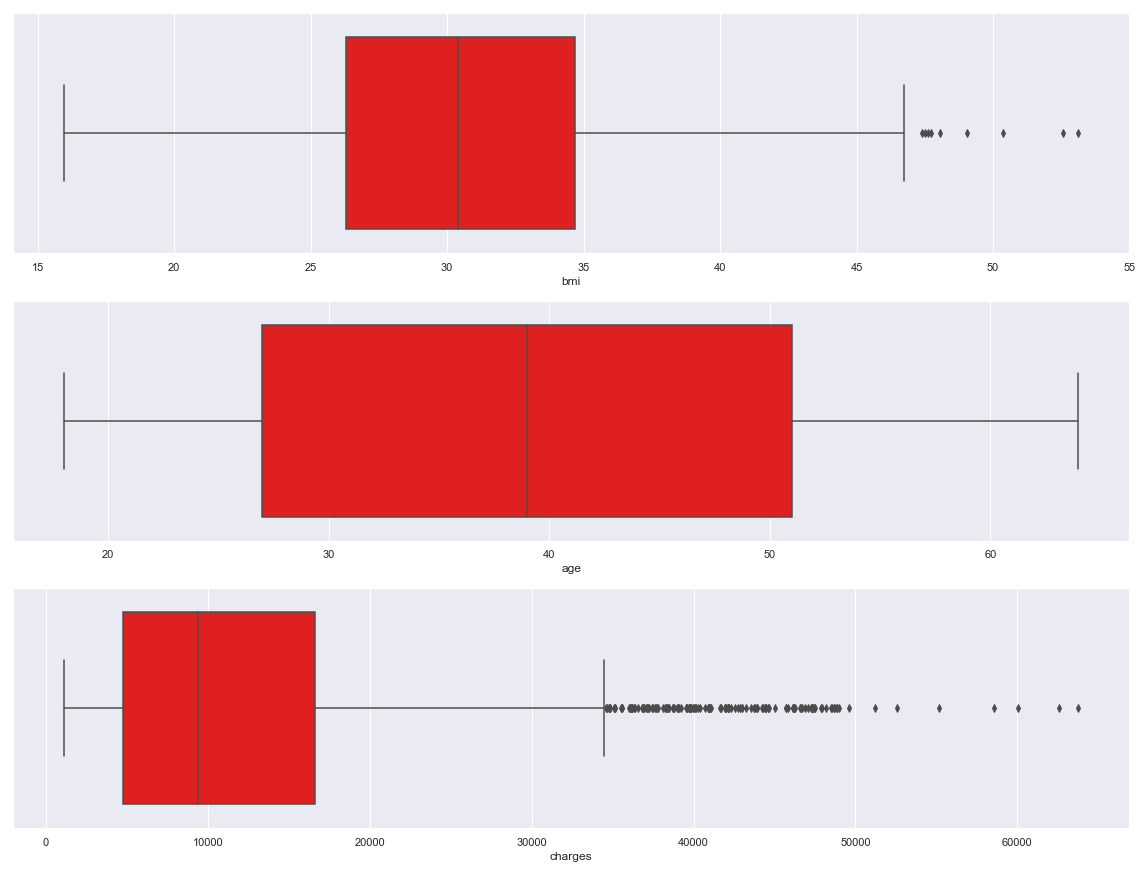

In [7]:
# Checking for the outliers
plt.figure(figsize= (20,15))
x=['bmi','age','charges']
for i in range(1,4):
    plt.subplot(3,1,i)
    sns.boxplot(x= insurance_df[x[i-1]], color='red',orient='h')

### Write the code to show age and charges graphs, same as we did for bmi (bmi is Body Mass Index)


plt.show()

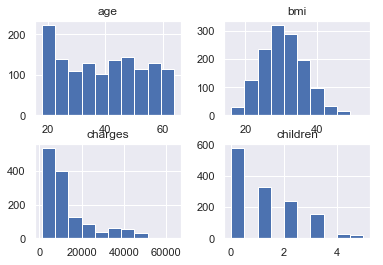

In [8]:
insurance_df.hist();

Output should include this Analysis:

- bmi has a few extreme values.

- charges as it is highly skewed, there are quiet a lot of extreme values.

In [9]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Output should include this Analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

# Task 4: Creating visual methods to analyze the data.

# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

### Write the code to show age and charges graphs, same as we did for bmi

plt.show()

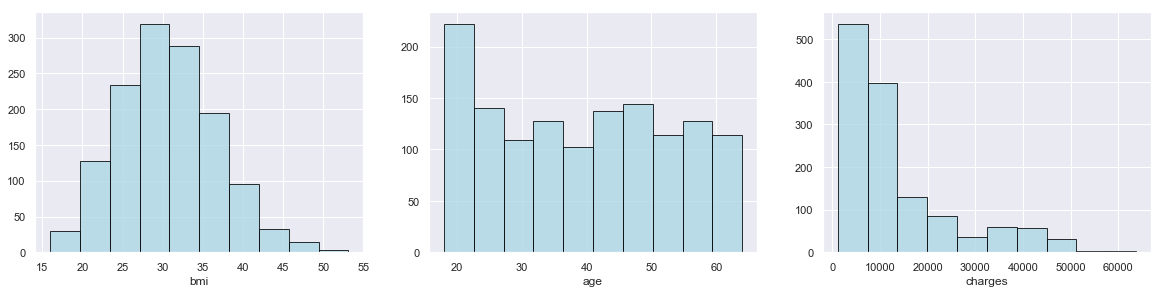

In [10]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize=(20,15))
x=['bmi','age','charges']
for i in range(1,4):
    plt.subplot(3,3,i)
    plt.hist(insurance_df[x[i-1]],color='lightblue',edgecolor='black',alpha=.8)
    plt.xlabel(x[i-1])
plt.show()

Output should include this Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed.

In [11]:
# showing the skewness of variables
Skewness = pd.DataFrame(insurance_df[['bmi','age','charges']].skew(axis =0), columns=['Skewness'])
#Skewness.rename(columns = {'Skewness':'skewness'}, inplace= True)### Your Code Here
#another answer
#Skewness = pd.DataFrame({'Skewness':[stats.skew(insurance_df[col]) for col in ['bmi','age','charges']]}, index=['bmi','age','charges'])
# We Will Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


Output should include this Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

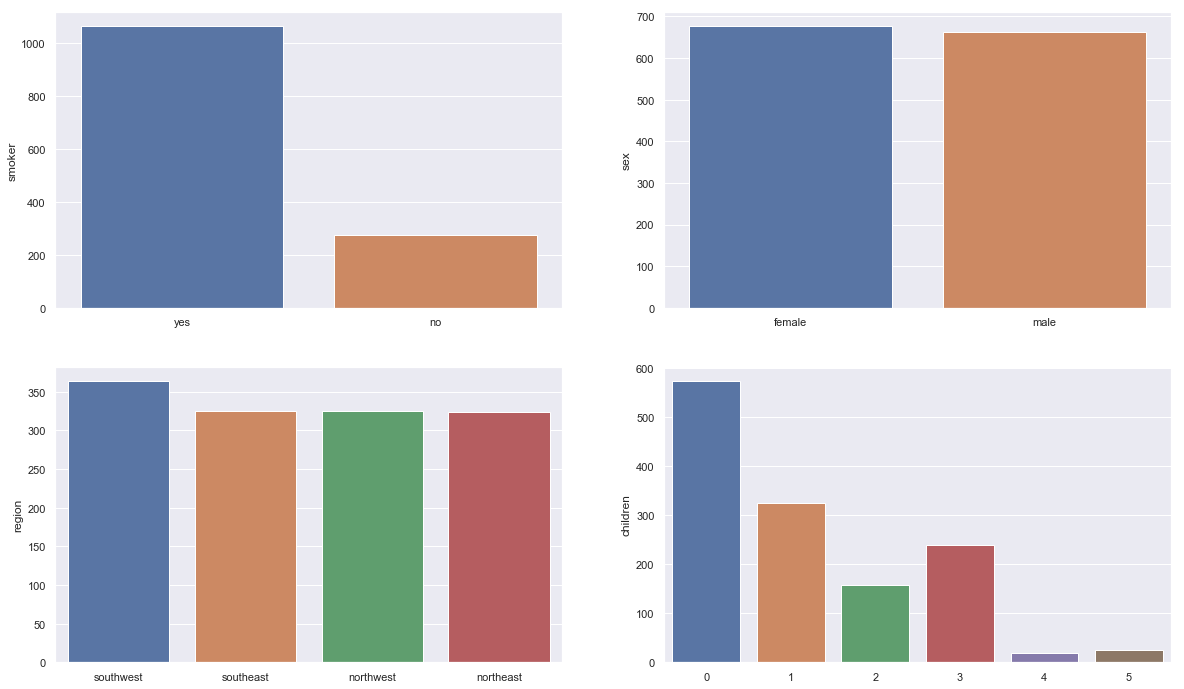

In [12]:

# visualizing data to make analysis
cols = ['smoker','sex','region','children']
plt.figure(figsize=(20,25))
for i in range(1,5):
    plt.subplot(4,2,i)
    sns.barplot(x=insurance_df[cols[i-1]].unique(), y = insurance_df[cols[i-1]].value_counts() )
plt.show()
    

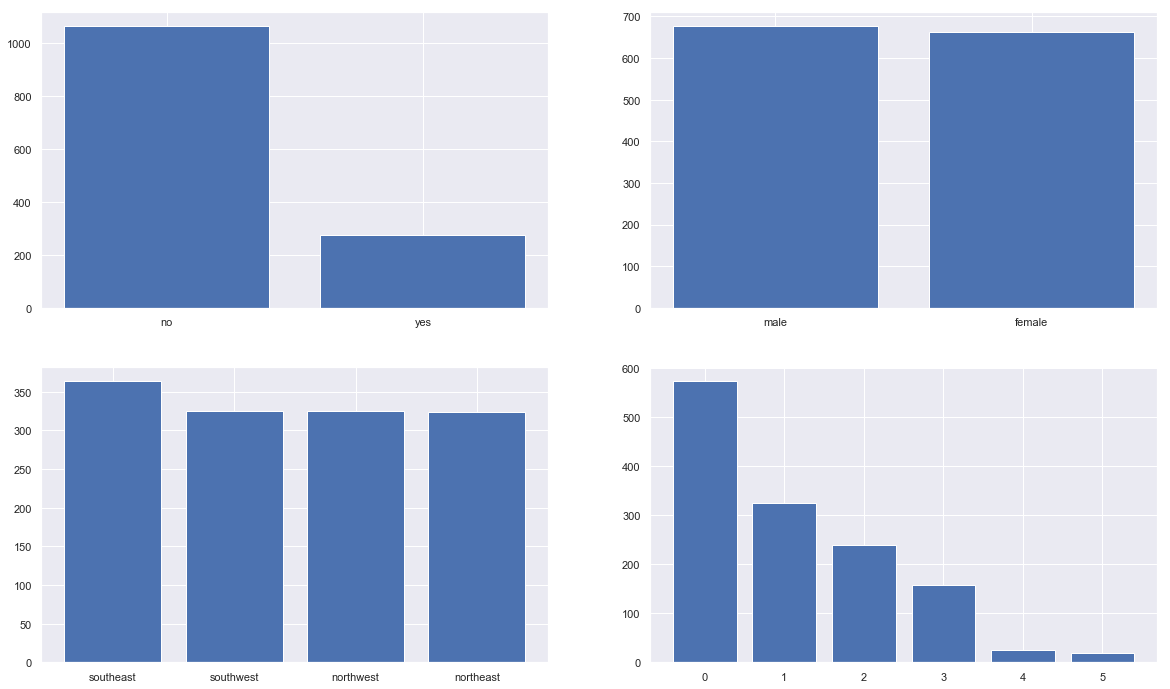

In [13]:

#cols = ['smoker','sex','region','children']
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
x=insurance_df['smoker'].value_counts().index
y = [insurance_df['smoker'].value_counts()[i] for i in x]
plt.bar(x, y )


plt.subplot(4,2,2)
x1=insurance_df['sex'].value_counts().index
y1 = [insurance_df['sex'].value_counts()[i] for i in x1]
plt.bar(x1, y1 )

plt.subplot(4,2,3)
x2=insurance_df['region'].value_counts().index
y2 = [insurance_df['region'].value_counts()[i] for i in x2]
plt.bar(x2, y2 )

plt.subplot(4,2,4)
x3=insurance_df['children'].value_counts().index
y3 = [insurance_df['children'].value_counts()[i] for i in x3]
plt.bar(x3, y3 )

plt.show()

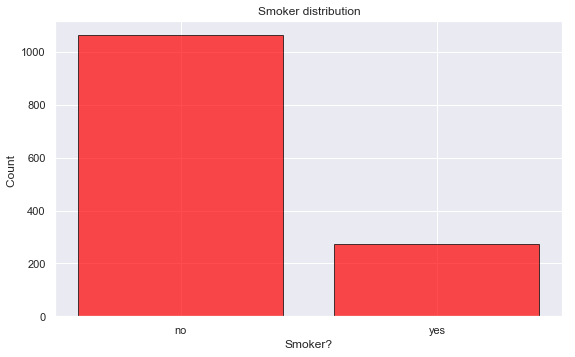

In [14]:

# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = insurance_df.smoker.value_counts().index    #Values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

### Your code here, write the code for Gender plot

x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

### Your code here, write the code for Region plot


x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

### Your code here, write the code for Children plot


plt.show()

Output should include this Analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

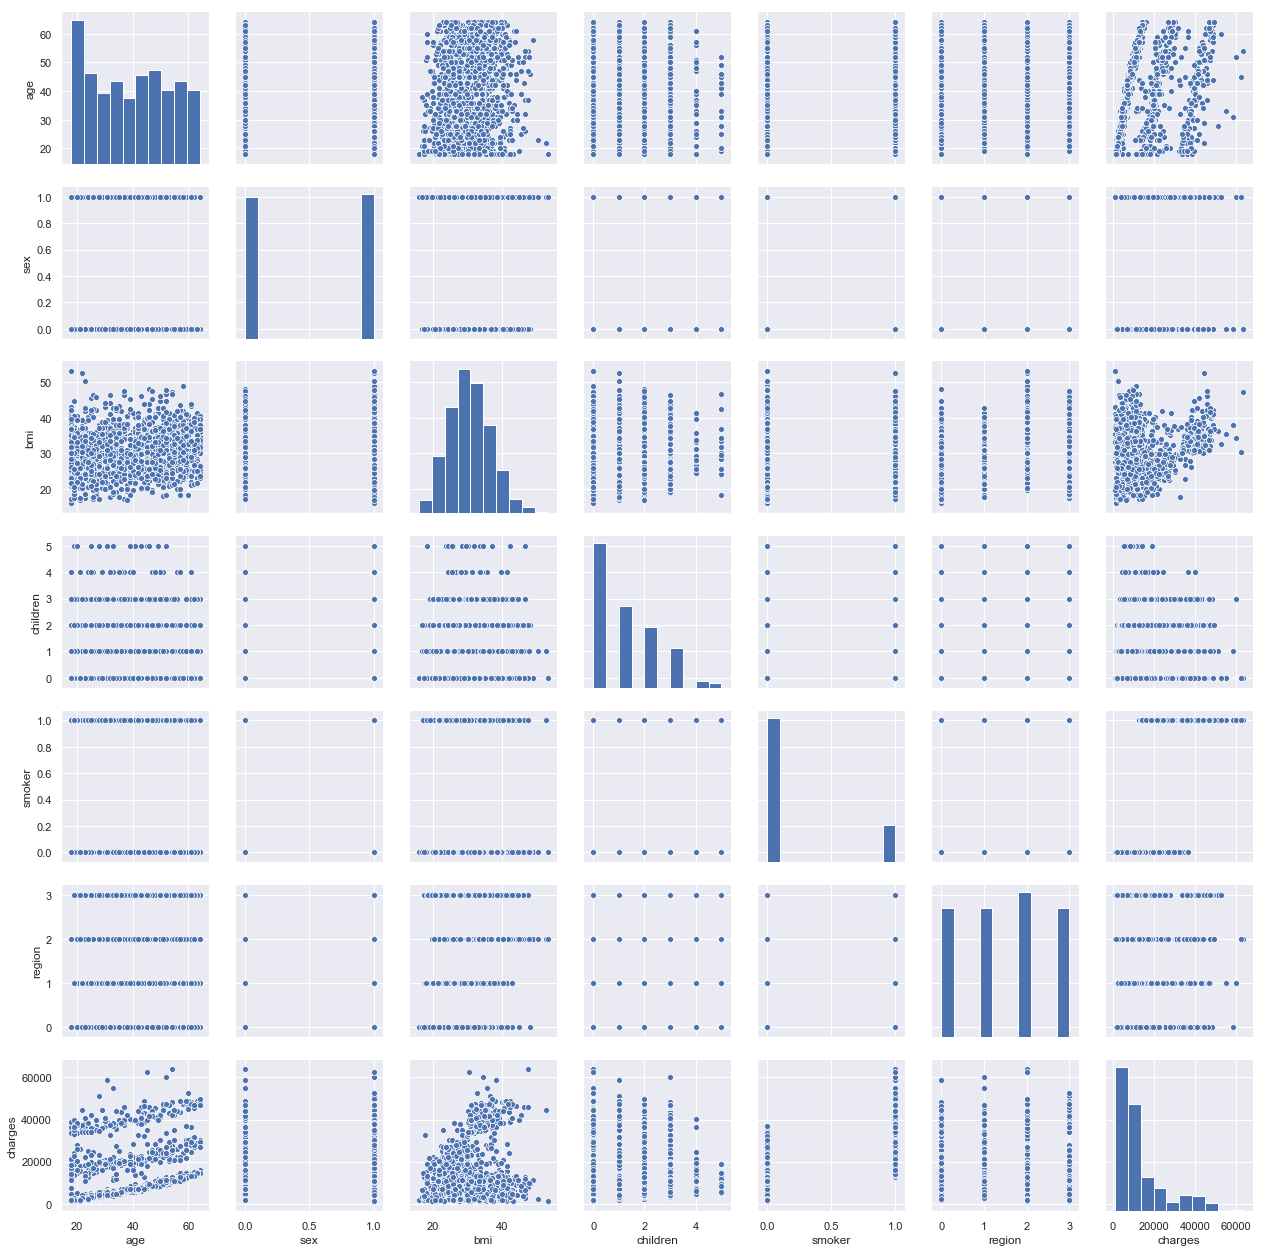

In [15]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(insurance_df)### Your Code Here
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

# Task 5: Analyzing trends, patterns, and relationships in the Data.

In [20]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()
insurance_df.groupby('smoker')['charges'].sum()

Do charges of people who smoke differ significantly from the people who don't?


smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

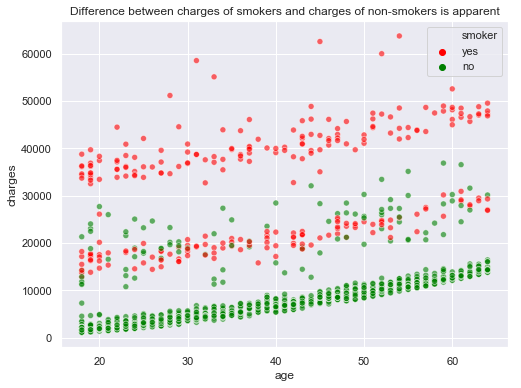

In [21]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

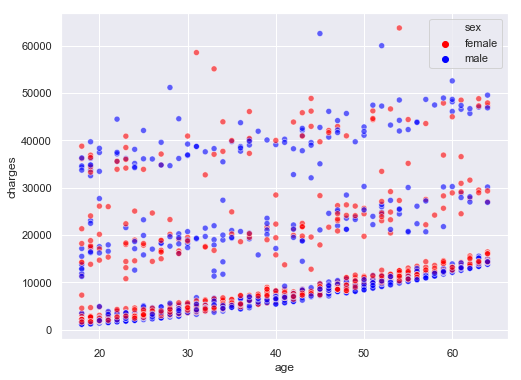

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.sex,palette= ['red','blue'],alpha=.6 )

There is no apparent relation between gender and charges

In [26]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [27]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df['smoker']=='yes'].charges)### Your Code Here  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df[insurance_df['smoker']=='no'].charges)### Your Code Here # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Thus, Smokers seem to claim significantly more money than non-smokers

In [28]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [29]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df['sex']=='male'].bmi)### Your Code Here  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df['sex']=='female'].bmi)### Your Code Here # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both the genders are identical


In [31]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])
### Your Code Here  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females



In [32]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['region'],insurance_df['smoker'])### Your Code Here  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


* Smoking habbits of people of different regions are similar


In [33]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex']=='female'])### Your Code Here

zero = female_df[female_df.children ==0]['bmi']### Your Code Here
one = female_df[female_df.children ==1]['bmi']### Your Code Here
two = female_df[female_df.children ==2]['bmi']### Your Code Here


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


# Congratulations! You are now able to Perform Exploratory Data Analysis to your pwn Data Science Projects!